In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## EDA

In [5]:
df = pd.read_csv('rhc.csv')

In [6]:
df.head()

,Unnamed: 0,cat1,cat2,ca,sadmdte,dschdte,dthdte,lstctdte,death,cardiohx,...,meta,hema,seps,trauma,ortho,adld3p,urin1,race,income,ptid
0,1,COPD,NaN,Yes,11142,11151.0,NaN,11382,No,0,...,No,No,No,No,No,0.0,NaN,white,Under $11k,5
1,2,MOSF w/Sepsis,NaN,No,11799,11844.0,11844.0,11844,Yes,1,...,No,No,Yes,No,No,NaN,1437.0,white,Under $11k,7
2,3,MOSF w/Malignancy,MOSF w/Sepsis,Yes,12083,12143.0,NaN,12400,No,0,...,No,No,No,No,No,NaN,599.0,white,$25-$50k,9
3,4,ARF,NaN,No,11146,11183.0,11183.0,11182,Yes,0,...,No,No,No,No,No,NaN,NaN,white,$11-$25k,10
4,5,MOSF w/Sepsis,NaN,No,12035,12037.0,12037.0,12036,Yes,0,...,No,No,No,No,No,NaN,64.0,white,Under $11k,11


In [14]:
df.keys()

Index(['Unnamed: 0', 'cat1', 'cat2', 'ca', 'sadmdte', 'dschdte', 'dthdte',
       'lstctdte', 'death', 'cardiohx', 'chfhx', 'dementhx', 'psychhx',
       'chrpulhx', 'renalhx', 'liverhx', 'gibledhx', 'malighx', 'immunhx',
       'transhx', 'amihx', 'age', 'sex', 'edu', 'surv2md1', 'das2d3pc',
       't3d30', 'dth30', 'aps1', 'scoma1', 'meanbp1', 'wblc1', 'hrt1', 'resp1',
       'temp1', 'pafi1', 'alb1', 'hema1', 'bili1', 'crea1', 'sod1', 'pot1',
       'paco21', 'ph1', 'swang1', 'wtkilo1', 'dnr1', 'ninsclas', 'resp',
       'card', 'neuro', 'gastr', 'renal', 'meta', 'hema', 'seps', 'trauma',
       'ortho', 'adld3p', 'urin1', 'race', 'income', 'ptid'],
      dtype='object')

In [15]:
df['swang1'].value_counts()

swang1
No RHC    3551
RHC       2184
Name: count, dtype: int64

In [16]:
df["cat1"].value_counts()

cat1
ARF                  2490
MOSF w/Sepsis        1227
COPD                  457
CHF                   456
Coma                  436
MOSF w/Malignancy     399
Cirrhosis             224
Lung Cancer            39
Colon Cancer            7
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 63 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5735 non-null   int64  
 1   cat1        5735 non-null   object 
 2   cat2        1200 non-null   object 
 3   ca          5735 non-null   object 
 4   sadmdte     5735 non-null   int64  
 5   dschdte     5734 non-null   float64
 6   dthdte      3722 non-null   float64
 7   lstctdte    5735 non-null   int64  
 8   death       5735 non-null   object 
 9   cardiohx    5735 non-null   int64  
 10  chfhx       5735 non-null   int64  
 11  dementhx    5735 non-null   int64  
 12  psychhx     5735 non-null   int64  
 13  chrpulhx    5735 non-null   int64  
 14  renalhx     5735 non-null   int64  
 15  liverhx     5735 non-null   int64  
 16  gibledhx    5735 non-null   int64  
 17  malighx     5735 non-null   int64  
 18  immunhx     5735 non-null   int64  
 19  transhx     5735 non-null  

In [33]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['cat1', 'cat2', 'ca', 'death', 'sex', 'dth30', 'swang1', 'dnr1',
       'ninsclas', 'resp', 'card', 'neuro', 'gastr', 'renal', 'meta', 'hema',
       'seps', 'trauma', 'ortho', 'race', 'income'],
      dtype='object')

In [34]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns

Index(['Unnamed: 0', 'sadmdte', 'dschdte', 'dthdte', 'lstctdte', 'cardiohx',
       'chfhx', 'dementhx', 'psychhx', 'chrpulhx', 'renalhx', 'liverhx',
       'gibledhx', 'malighx', 'immunhx', 'transhx', 'amihx', 'age', 'edu',
       'surv2md1', 'das2d3pc', 't3d30', 'aps1', 'scoma1', 'meanbp1', 'wblc1',
       'hrt1', 'resp1', 'temp1', 'pafi1', 'alb1', 'hema1', 'bili1', 'crea1',
       'sod1', 'pot1', 'paco21', 'ph1', 'wtkilo1', 'adld3p', 'urin1', 'ptid'],
      dtype='object')

In [41]:
columns_with_na = df.columns[df.isna().any()].tolist()
columns_with_na

['cat2', 'dschdte', 'dthdte', 'adld3p', 'urin1']

In [39]:
na_counts = df.isna().sum()
na_counts

Unnamed: 0       0
cat1             0
cat2          4535
ca               0
sadmdte          0
dschdte          1
dthdte        2013
lstctdte         0
death            0
cardiohx         0
chfhx            0
dementhx         0
psychhx          0
chrpulhx         0
renalhx          0
liverhx          0
gibledhx         0
malighx          0
immunhx          0
transhx          0
amihx            0
age              0
sex              0
edu              0
surv2md1         0
das2d3pc         0
t3d30            0
dth30            0
aps1             0
scoma1           0
meanbp1          0
wblc1            0
hrt1             0
resp1            0
temp1            0
pafi1            0
alb1             0
hema1            0
bili1            0
crea1            0
sod1             0
pot1             0
paco21           0
ph1              0
swang1           0
wtkilo1          0
dnr1             0
ninsclas         0
resp             0
card             0
neuro            0
gastr            0
renal       

In [36]:
na_percentage = na_counts / len(df)
na_percentage

Unnamed: 0    0.000000
cat1          0.000000
cat2          0.790759
ca            0.000000
sadmdte       0.000000
dschdte       0.000174
dthdte        0.351003
lstctdte      0.000000
death         0.000000
cardiohx      0.000000
chfhx         0.000000
dementhx      0.000000
psychhx       0.000000
chrpulhx      0.000000
renalhx       0.000000
liverhx       0.000000
gibledhx      0.000000
malighx       0.000000
immunhx       0.000000
transhx       0.000000
amihx         0.000000
age           0.000000
sex           0.000000
edu           0.000000
surv2md1      0.000000
das2d3pc      0.000000
t3d30         0.000000
dth30         0.000000
aps1          0.000000
scoma1        0.000000
meanbp1       0.000000
wblc1         0.000000
hrt1          0.000000
resp1         0.000000
temp1         0.000000
pafi1         0.000000
alb1          0.000000
hema1         0.000000
bili1         0.000000
crea1         0.000000
sod1          0.000000
pot1          0.000000
paco21        0.000000
ph1        

In [31]:
# set style
plt.style.use('ggplot')
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

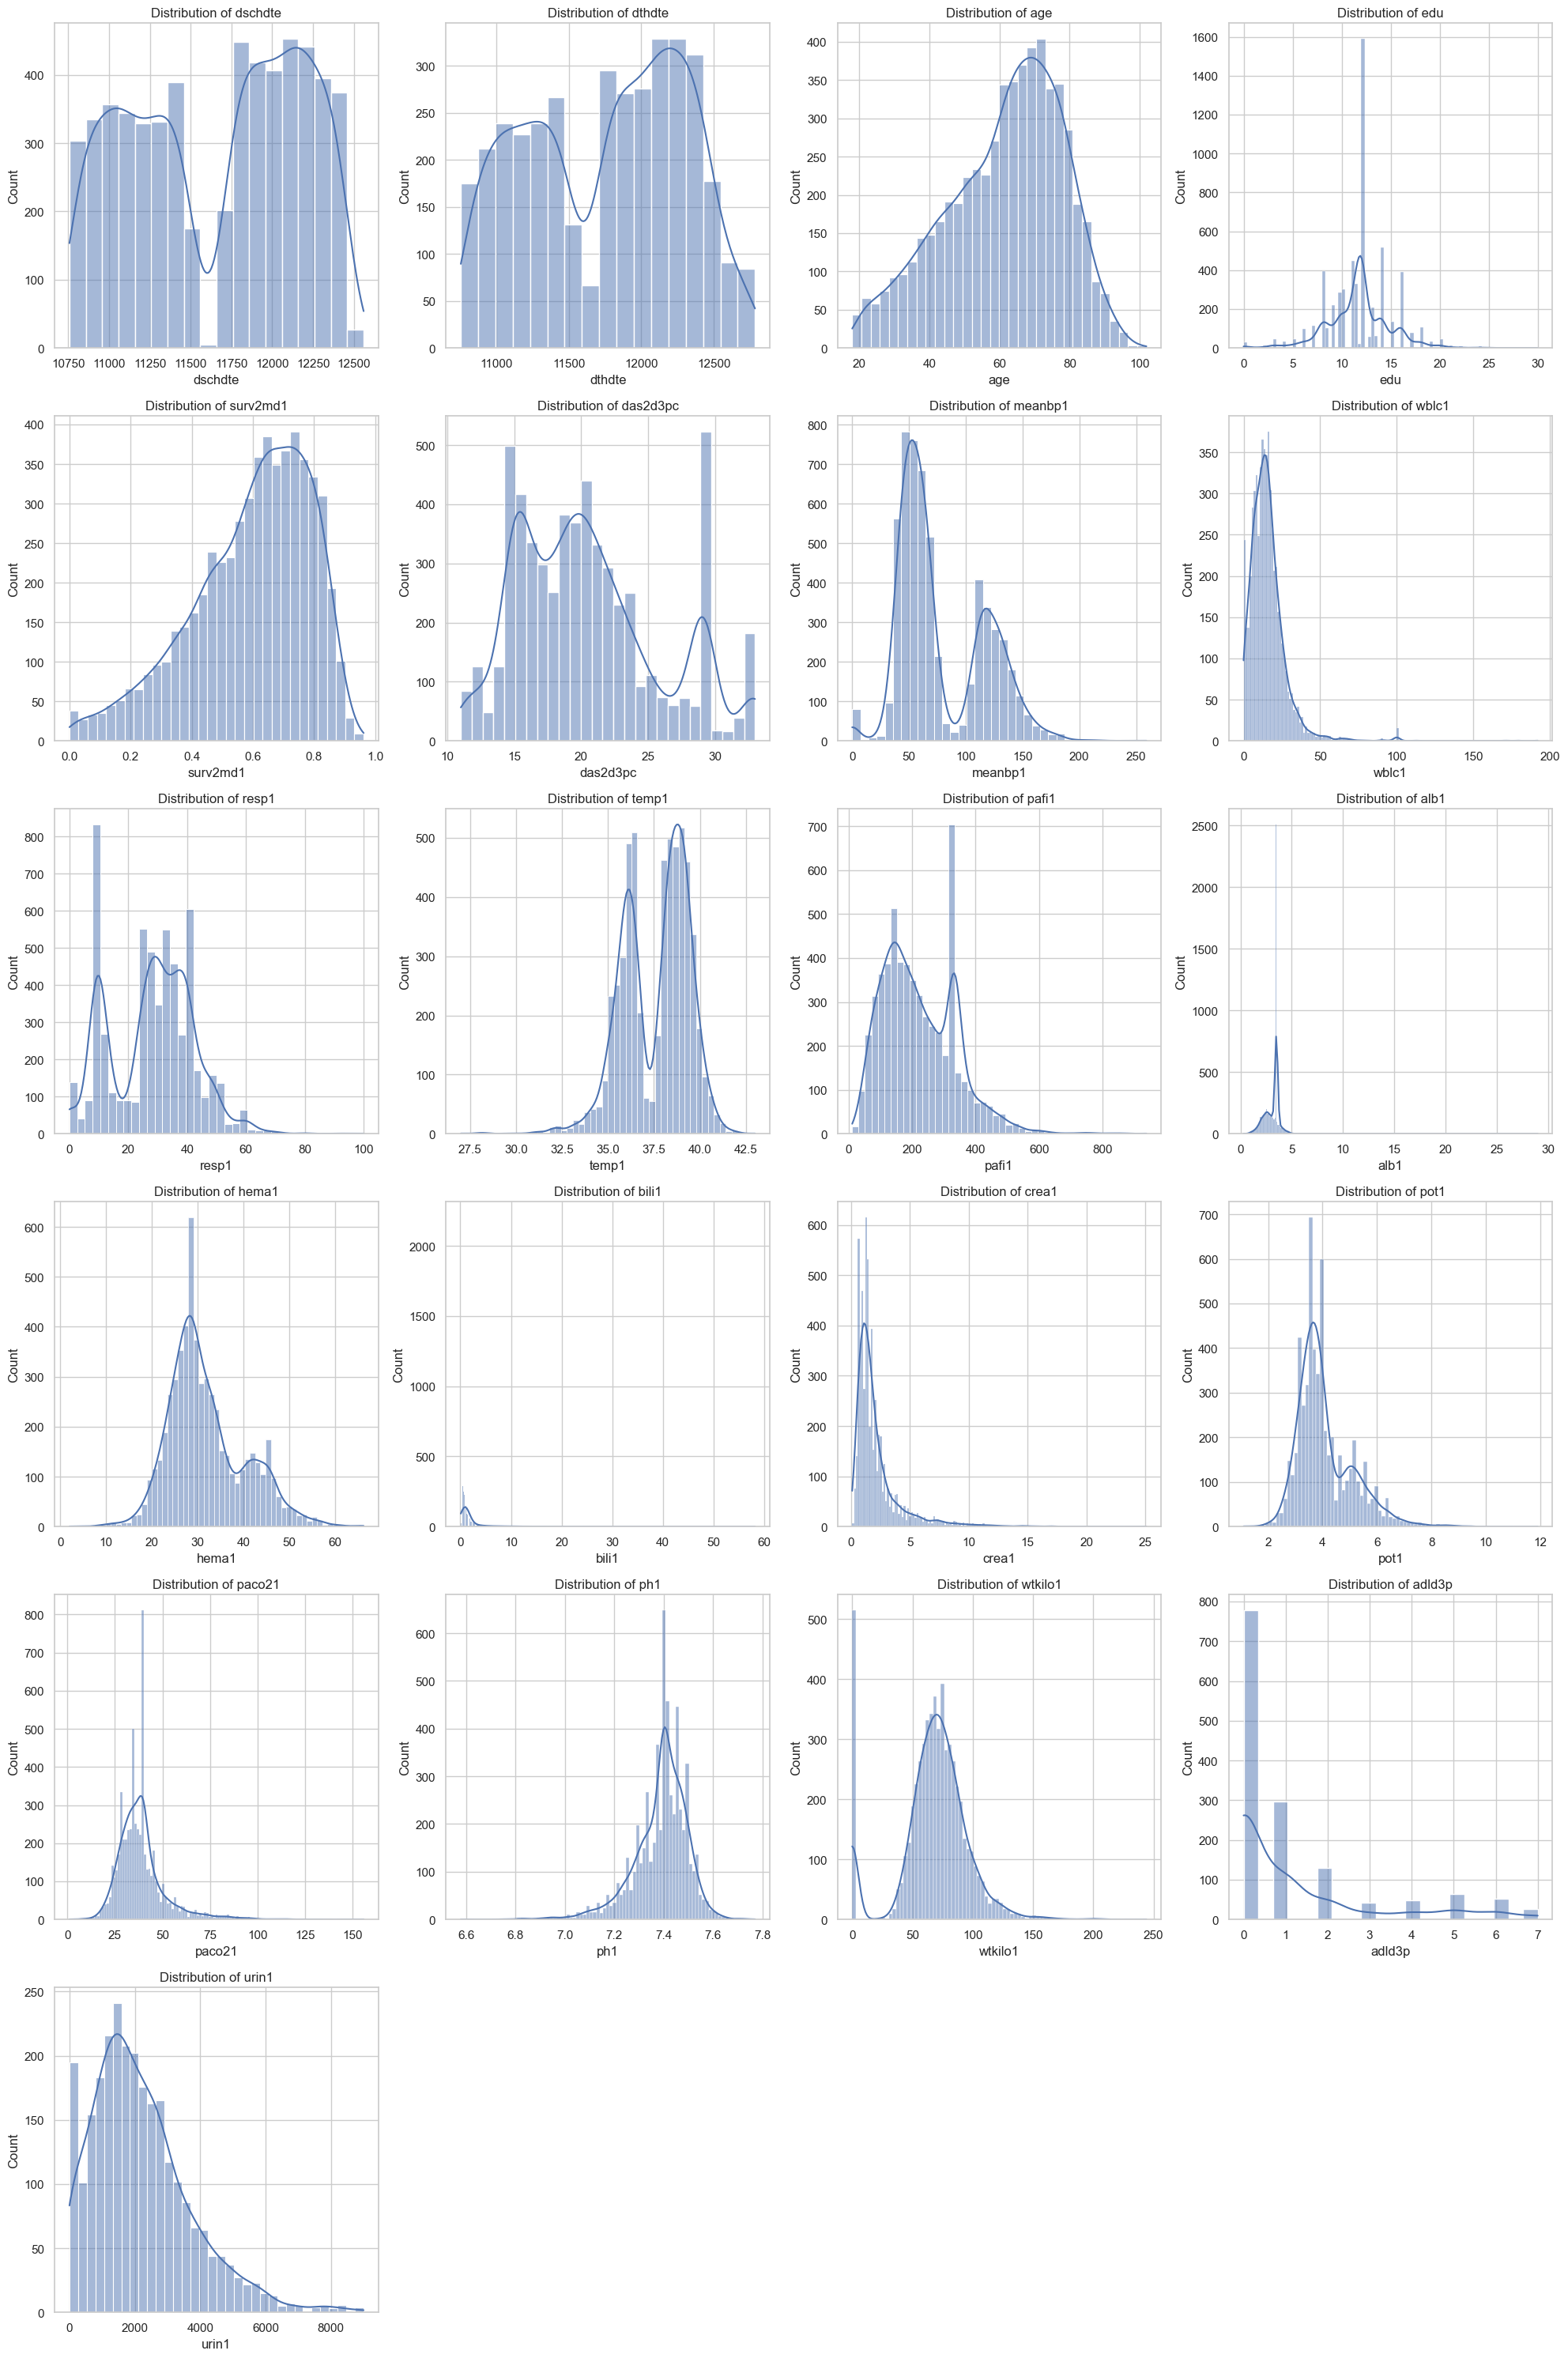

In [45]:
# Analyze data distributions of numerical features
float_columns = df.select_dtypes(include=['float64']).columns
plt.figure(figsize=(20, 30))

for i, column in enumerate(float_columns):
    plt.subplot(6, 4, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()